In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import pandas as pd
from glob import glob
import pylab
import os
import seaborn as sns
from matplotlib.patches import Rectangle
import csv
import random
from skimage import measure
from skimage.transform import resize
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt


det_class = 'C:/Users/Niyati/Desktop/Northeastern/FAI/project/stage_2_detailed_class_info.csv'
boxes = 'C:/Users/Niyati/Desktop/Northeastern/FAI/project/stage_2_train_labels.csv'

ModuleNotFoundError: No module named 'pydicom'

In [2]:
det_class_df = pd.read_csv(det_class)
print(det_class_df.shape[0], 'class infos loaded')
print(det_class_df['patientId'].value_counts().shape[0], 'patient cases')
det_class_df.groupby('class').size().plot.bar()
det_class_df.sample(3)


NameError: name 'pd' is not defined

In [38]:
boxes_df = pd.read_csv(boxes)
print(boxes_df.shape[0], 'boxes')
print(boxes_df['patientId'].value_counts().shape[0], 'patient cases')
boxes_df.sample(10)

30227 boxes
26684 patient cases


,patientId,x,y,width,height,Target
8548,604d68d0-417b-4c20-bdb1-5a21638738e2,NaN,NaN,NaN,NaN,0
10213,6d5d18aa-9418-42fc-b2bf-80bb4dec0291,NaN,NaN,NaN,NaN,0
5341,461315f1-e601-45cd-8350-7952ff4833ef,NaN,NaN,NaN,NaN,0
4787,416142c6-f196-433a-b6d7-7752a8d2d8da,NaN,NaN,NaN,NaN,0
4097,3ca6661a-ffbd-4d4d-b49b-c96cfd218307,87.0,104.0,310.0,793.0,1
23708,d55f67db-c835-43a1-a4a1-a80468eb7b75,NaN,NaN,NaN,NaN,0
26788,ee8a4128-a907-475b-a363-9cd60d65e46e,644.0,434.0,182.0,347.0,1
3213,36f8833d-6bec-4307-af23-3908684ee79b,579.0,356.0,236.0,258.0,1
7366,5674f428-78fa-4e0c-8ecb-b5ecc2d83018,NaN,NaN,NaN,NaN,0
1583,1738d7da-d93e-4f81-aefd-a1adb148664d,151.0,553.0,251.0,158.0,1


In [39]:
combined_df = pd.merge(boxes_df, det_class_df, how='inner', on='patientId')
print(combined_df.shape[0], 'combined cases')

37629 combined cases


In [40]:
combined_df = pd.concat([boxes_df, 
                        det_class_df.drop('patientId',1)], 1)
print(combined_df.shape[0], 'combined cases')
combined_df.sample(10)

30227 combined cases


,patientId,x,y,width,height,Target,class
14773,916a0cd0-d682-43e0-aeb2-8da59c626599,216.0,331.0,284.0,591.0,1,Lung Opacity
28941,ff9f1f48-402c-4a72-9ceb-d97c416726d6,NaN,NaN,NaN,NaN,0,Normal
5413,46af7496-327e-4f5d-ada2-b052ada8fb36,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
15126,9443c291-caf7-4278-8221-9f68a3af6bc3,NaN,NaN,NaN,NaN,0,Normal
14448,8ed6a49a-e7a9-4501-9ddc-bd0233c1c0ec,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
11967,7b38a034-0bcf-4d61-9437-cc59ba038c07,NaN,NaN,NaN,NaN,0,Normal
11847,7a1ddad0-eda0-4ae1-872f-50960e5abeff,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
15385,9662cf15-893b-475f-b0e7-2c6d98dfa057,NaN,NaN,NaN,NaN,0,Normal
26597,ecf17d02-12df-4cb1-b56a-b4dc014767e7,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
8694,6186e217-86ef-4140-8b7f-ae056a4eaf3b,NaN,NaN,NaN,NaN,0,Normal


In [41]:
final = combined_df.dropna()
print(final.shape[0], 'combined cases')
final.sample(10)

9555 combined cases


,patientId,x,y,width,height,Target,class
7919,5b19f8e2-420c-42a8-82d5-5e1e5d30939b,663.0,259.0,117.0,198.0,1,Lung Opacity
2619,32fbc636-5413-419b-8539-6e6a7cca9f4b,518.0,639.0,202.0,266.0,1,Lung Opacity
4269,3dc8aa2f-0e49-47ba-9eaf-1a3bdb189ada,185.0,528.0,191.0,250.0,1,Lung Opacity
3347,37c377d9-a4f9-4b58-82b5-42c1624e2d57,92.0,412.0,235.0,288.0,1,Lung Opacity
13623,889672e3-66b7-4879-9b02-0bc41d3f66d2,164.0,268.0,262.0,424.0,1,Lung Opacity
20990,bea7dfb0-2138-4434-977f-1ee4a6428941,598.0,324.0,147.0,296.0,1,Lung Opacity
22735,cd324889-a183-4d10-916f-d69384b4cb1d,640.0,260.0,289.0,507.0,1,Lung Opacity
13612,8882a89a-09fa-4724-9e1b-283023523b01,596.0,261.0,292.0,504.0,1,Lung Opacity
3765,3a6c8986-b679-43a4-aa31-9e9e59b5d79b,561.0,178.0,214.0,546.0,1,Lung Opacity
20426,bb0e4a7c-5f47-4c43-892c-2ab317601edf,298.0,378.0,162.0,245.0,1,Lung Opacity


<Figure size 432x288 with 0 Axes>

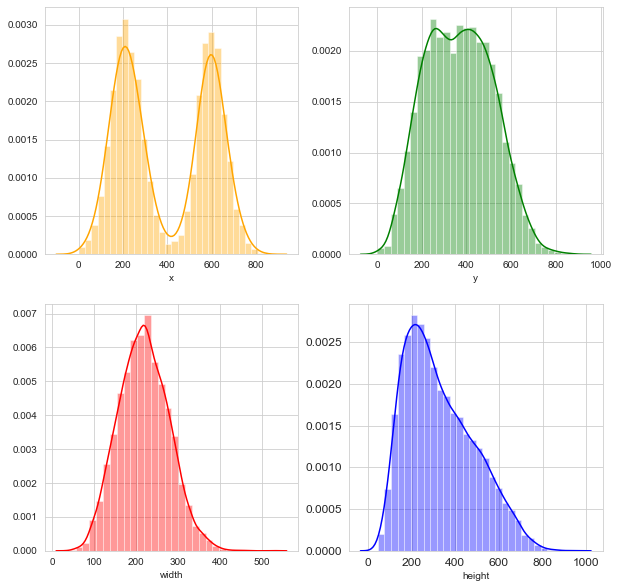

In [42]:
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.distplot(final['x'],kde=True,bins=30, color="orange", ax=ax[0,0])
sns.distplot(final['y'],kde=True,bins=30, color="green", ax=ax[0,1])
sns.distplot(final['width'],kde=True,bins=30, color="red", ax=ax[1,0])
sns.distplot(final['height'],kde=True,bins=30, color="blue", ax=ax[1,1])

locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

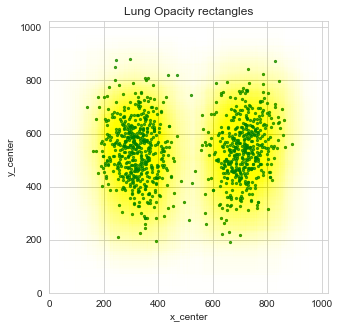

In [43]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
final1 = final.sample(1000)
final1['x_center'] = final1['x'] + final1['width'] / 2
final1['y_center'] = final1['y'] + final1['height'] / 2
plt.title("Lung Opacity rectangles")
final1.plot.scatter(x='x_center', y='y_center', xlim=(0,1024), ylim=(0,1024), ax=ax, alpha=0.7, marker=".", color="green")
for i, sample in final1.iterrows():
    ax.add_patch(Rectangle(xy=(sample['x'], sample['y']),
                width=sample['width'],height=sample['height'],alpha=3.5e-3, color="yellow"))
plt.show()

In [44]:
final.groupby(['class', 'Target']).size().reset_index(name='Patient Count')

,class,Target,Patient Count
0,Lung Opacity,1,9555


In [45]:
box_df = combined_df.groupby('patientId').size().reset_index(name='boxes')
combined_df = pd.merge(combined_df, box_df, on='patientId')
box_df.groupby('boxes').size().reset_index(name='patients')

,boxes,patients
0,1,23286
1,2,3266
2,3,119
3,4,13


In [46]:
box1_df = final.groupby('patientId').size().reset_index(name='boxes1')
final = pd.merge(final, box1_df, on='patientId')
box1_df.groupby('boxes1').size().reset_index(name='patients')

,boxes1,patients
0,1,2614
1,2,3266
2,3,119
3,4,13


In [47]:
images = '/Users/mayur/Downloads/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv'
boxes = '/Users/mayur/Downloads/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv'

boxes = pd.read_csv('/Users/mayur/Downloads/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv')
print(boxes.iloc[0])

patientId    0004cfab-14fd-4e49-80ba-63a80b6bddd6
x                                             NaN
y                                             NaN
width                                         NaN
height                                        NaN
Target                                          0
Name: 0, dtype: object


In [48]:
print(boxes.iloc[8])

patientId    00704310-78a8-4b38-8475-49f4573b2dbb
x                                             323
y                                             577
width                                         160
height                                        104
Target                                          1
Name: 8, dtype: object


In [49]:
patientId = boxes['patientId'][8]
print(patientId)
dicom_file = 'C:/Users/mayur/Downloads/rsna-pneumonia-detection-challenge/stage_2_train_images/%s.dcm' % patientId
myDICOM = pydicom.read_file(dicom_file)

00704310-78a8-4b38-8475-49f4573b2dbb


In [50]:
image_pixel = myDICOM.pixel_array
print(type(image_pixel))
print(image_pixel.shape)

<class 'numpy.ndarray'>
(1024, 1024)


(-0.5, 1023.5, 1023.5, -0.5)

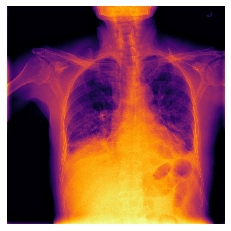

In [51]:
pylab.imshow(image_pixel, cmap=pylab.cm.inferno)
pylab.axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

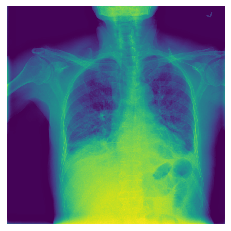

In [52]:
pylab.imshow(image_pixel, cmap=pylab.cm.viridis)
pylab.axis('off')

0004cfab-14fd-4e49-80ba-63a80b6bddd6


(-0.5, 1023.5, 1023.5, -0.5)

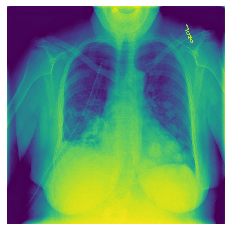

In [53]:
patientId = boxes['patientId'][0]
print(patientId)
dicom_file = 'C:/Users/mayur/Downloads/rsna-pneumonia-detection-challenge/stage_2_train_images/%s.dcm' % patientId
myDICOM = pydicom.read_file(dicom_file)
image_pixel = myDICOM.pixel_array
pylab.imshow(image_pixel, cmap=pylab.cm.viridis)
pylab.axis('off')

In [54]:
def parse_data(df):
    extract_box = lambda row: [row['y'], row['x'], row['height'], row['width']]

    parsed = {}
    for n, row in df.iterrows(): 
        pid = row['patientId']
        if pid not in parsed:
            parsed[pid] = {
                'dicom': 'C:/Users/mayur/Downloads/rsna-pneumonia-detection-challenge/stage_2_train_images/%s.dcm' % pid,
                'label': row['Target'],
                'boxes': []}

        if parsed[pid]['label'] == 1:
            parsed[pid]['boxes'].append(extract_box(row))

    return parsed

In [55]:
parsed = parse_data(boxes)

In [56]:
def constructBoxes(image):
    d = pydicom.read_file(image['dicom'])
    pixels = d.pixel_array
    #Convert from 3d for rgb pixels
    pixels = np.stack([pixels] * 3, axis=2)

    for box in image['boxes']:
        rgb = [0,255,0]
        pixels = overlay_box(pixels=pixels, box=box, rgb=rgb, stroke=8)
    pylab.imshow(pixels, cmap=pylab.cm.viridis)
    pylab.axis('off')

def overlay_box(pixels, box, rgb, stroke=8):
    #get integers coordinates
    box = [int(b) for b in box]
    
    #get x,y coordinates
    y1, x1, height, width = box
    y2 = y1 + height 
    x2 = x1 + width

    pixels[y1:y1 + stroke, x1:x2] = rgb
    pixels[y2:y2 + stroke, x1:x2] = rgb
    pixels[y1:y2, x1:x1 + stroke] = rgb
    pixels[y1:y2, x2:x2 + stroke] = rgb

    return pixels

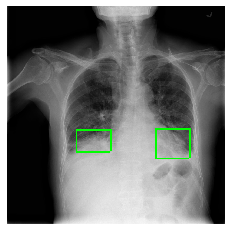

In [57]:
constructBoxes(parsed['00704310-78a8-4b38-8475-49f4573b2dbb'])

In [58]:
from skimage import measure
from skimage.transform import resize
import tensorflow as tf
from tensorflow import keras
import csv

In [60]:
pneumonia_locations = {}
# load table
with open(os.path.join('C:/Users/mayur/Downloads/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv'), mode='r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

In [61]:
folder = 'C:/Users/mayur/Downloads/rsna-pneumonia-detection-challenge/stage_2_train_images'
filenames = os.listdir(folder)
print(len(filenames))
# split into train and test filenames
test = int(len(filenames) * 0.2)
print(test)
train = filenames[test:]
test = filenames[:test]
print('train', len(train))
print('test', len(test))

26684
5336
train 21348
test 5336
